<a href="https://colab.research.google.com/github/elmaazouziyassine/Machine_Learning_Python/blob/master/1_Regression/Random%20Forest%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest Regression**



### **Data Preprocessing**




In [0]:
# Import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Import dataset
dataset = 'https://raw.githubusercontent.com/elmaazouziyassine/Machine_Learning_Python/master/1_Regression/positions_salaries.csv'
data = pd.read_csv(dataset)
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
data.count()

Position    10
Level       10
Salary      10
dtype: int64

In [4]:
# Separate Features Variables from Target Variable
X = data.iloc[:, 1:-1].values
y = data.iloc[:,-1].values
X, y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

Note : 
- Regarding the nature of the dataset, we cannot split the dataset. All recors have to be included.
- No need for Feature Scaling.


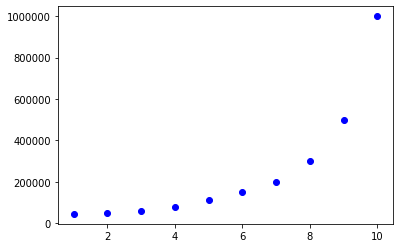

In [5]:
plt.scatter(X, y, c = 'blue')

### **Apply the model to the dataset**



In [8]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, criterion = 'mse')  # Nombre of trees 
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### **Predict new results**

In [10]:
# Predict the salary associated to level 6.5 using SVR (has to be compared with the results in Polynomial notebook)
d = regressor.predict([[6.5]])
d

array([162000.])

### **Visualize the results**

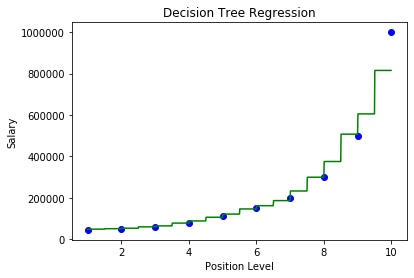

In [9]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, c = 'blue')
plt.plot(X_grid, regressor.predict(X_grid), c = 'green')

plt.title('Decision Tree Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### **Test the performance of the model**